# Dropout Notebook


### **Prerequisites**
* Regularization

***What will we cover in this notebook?***

* Explain dropout in nn
* Implementation in PyTorch
-----
1. What is dropout and why do we need it? What was the idea behind it?
2. How is dropout similar to ensembling a large variety of neural network architectures?
3. Implementation in PyTorch on a basic neural network
4. Visualising the difference between the non-dropout and dropout implemented models

### 1. What was the idea behind Dropout?
   * explain why we need dropout? Which problem leads us to do dropout
   * show a dropout example on a basic neural network
   * explain dropout parameters
   * important aspects of dropout
    

Let's assume that we want to have biceps and do sports for 4 days in a week.
In the first week,v 

### 2. Similarity between dropout and ensembles methods
   * explain what the ensemble method is
   * list the similary between them
   * what makes dropout unique

![ensemble.png](attachment:ensemble.png)

### 3. Implementation in PyTorch on a basic neural network 
* Copy the code in Neural Network Repo
* Implement dropout method

### 4. Visualizing the difference between a non-dropout and dropout implemented nn
* Copy the nn repo model performance metrics etc
* Explain the metrics used
* Evaluate the dropout model
* Compare training curves
* Compare model performance metrics

### **Non-dropout implementation can be found below:**

Extracting MNIST-data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST-data/MNIST/raw


Extracting MNIST-data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST-data/MNIST/raw


Extracting MNIST-data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST-data/MNIST/raw




Extracting MNIST-data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST-data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


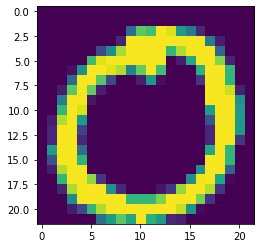

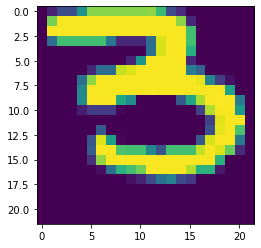

In [ ]:
import torch
from torchvision import datasets, transforms

crop_size = 22

traintransforms = []
traintransforms.append(transforms.CenterCrop(crop_size))
traintransforms.append(transforms.ToTensor())
traintransforms = transforms.Compose(traintransforms)

# GET THE TRAINING DATASET
train_data = datasets.MNIST(root='MNIST-data',                        # where is the data (going to be) stored
                            transform=traintransforms,          # transform the data from a PIL image to a tensor
                            train=True,                               # is this training data?
                            download=True                             # should i download it if it's not already here?
                           )

testtransforms = []
testtransforms.append(transforms.RandomCrop(crop_size))
testtransforms.append(transforms.ToTensor())
testtransforms = transforms.Compose(testtransforms)

# GET THE TEST DATASET
test_data = datasets.MNIST(root='MNIST-data',
                           transform=testtransforms,
                           train=False,
                          )

import matplotlib.pyplot as plt
import numpy as np
# PRINT THEIR LENGTHS AND VISUALISE AN EXAMPLE
x = train_data[np.random.randint(0, 300)][0]    # get the first example
plt.imshow(x[0].numpy())
plt.show()
x = test_data[np.random.randint(0, 300)][0]    # get the first example
plt.imshow(x[0].numpy())
plt.show()

# FURTHER SPLIT THE TRAINING INTO TRAINING AND VALIDATION
train_data, val_data = torch.utils.data.random_split(train_data, [50000, 10000])    # split into 50K training & 10K validation

In [ ]:
batch_size = 128

# MAKE TRAINING DATALOADER
train_loader = torch.utils.data.DataLoader(
    train_data,
    shuffle=True,
    batch_size=batch_size
)

# MAKE VALIDATION DATALOADER
val_loader = torch.utils.data.DataLoader(
    val_data,
    shuffle=True,
    batch_size=batch_size
)

# MAKE TEST DATALOADER
test_loader = torch.utils.data.DataLoader(
    test_data,
    shuffle=True,
    batch_size=batch_size
)

In [ ]:
import torch.nn.functional as F 

class NeuralNetworkClass(torch.nn.Module):
    def __init__(self):
        super().__init__()    # initialise parent module
        self.layer1 = torch.nn.Linear(crop_size*crop_size, 225)
        self.layer2 = torch.nn.Linear(225, 100)
        self.layer3 = torch.nn.Linear(100, 10)
        
    def forward(self, x):
        x = x.view(-1, crop_size*crop_size)
        x = self.layer1(x)
        x = F.relu(x)
        x = self.layer2(x)
        x = F.relu(x)
        x = self.layer3(x)
        x = F.softmax(x, dim=1)
        return x

def get_n_params(model):
    model_parameters = filter(lambda p: p.requires_grad, model.parameters())
    n_params = sum([np.prod(p.size()) for p in model_parameters])
    return n_params

In [ ]:
learning_rate = 0.0005
myNeuralNetwork = NeuralNetworkClass()
print('Number of parameters in model:', get_n_params(myNeuralNetwork))

# CREATE OUR OPTIMISER
optimiser = torch.optim.Adam(              # what optimiser should we use?
    myNeuralNetwork.parameters(),          # what should it optimise?
    lr=learning_rate                       # using what learning rate?
)

# CREATE OUR CRITERION
criterion = torch.nn.CrossEntropyLoss()             # callable class that compares our predictions to our labels and returns our loss

# SET UP TRAINING VISUALISATION
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()                            # we will use this to show our models performance on a graph

Number of parameters in model: 132735


In [ ]:
# TRAINING LOOP
def train(model, epochs):
    model.train()                                  # put the model into training mode (more on this later)
    for epoch in range(epochs):
        for idx, minibatch in enumerate(train_loader):
            inputs, labels = minibatch
            prediction = model(inputs)             # pass the data forward through the model
            loss = criterion(prediction, labels)   # compute the loss
            print('Epoch:', epoch, '\tBatch:', idx, '\tLoss:', loss)
            optimiser.zero_grad()                  # reset the gradients attribute of each of the model's params to zero
            loss.backward()                        # backward pass to compute and set all of the model param's gradients
            optimiser.step()                       # update the model's parameters
            writer.add_scalar('Loss/Train', loss, epoch*len(train_loader) + idx)    # write loss to a graph
            
            
train(myNeuralNetwork, 2)

Epoch: 0 	Batch: 0 	Loss: tensor(2.3032, grad_fn=<NllLossBackward>)
Epoch: 0 	Batch: 1 	Loss: tensor(2.3012, grad_fn=<NllLossBackward>)
Epoch: 0 	Batch: 2 	Loss: tensor(2.2994, grad_fn=<NllLossBackward>)
Epoch: 0 	Batch: 3 	Loss: tensor(2.2990, grad_fn=<NllLossBackward>)
Epoch: 0 	Batch: 4 	Loss: tensor(2.2969, grad_fn=<NllLossBackward>)
Epoch: 0 	Batch: 5 	Loss: tensor(2.2955, grad_fn=<NllLossBackward>)
Epoch: 0 	Batch: 6 	Loss: tensor(2.2927, grad_fn=<NllLossBackward>)
Epoch: 0 	Batch: 7 	Loss: tensor(2.2915, grad_fn=<NllLossBackward>)
Epoch: 0 	Batch: 8 	Loss: tensor(2.2870, grad_fn=<NllLossBackward>)
Epoch: 0 	Batch: 9 	Loss: tensor(2.2849, grad_fn=<NllLossBackward>)
Epoch: 0 	Batch: 10 	Loss: tensor(2.2828, grad_fn=<NllLossBackward>)
Epoch: 0 	Batch: 11 	Loss: tensor(2.2805, grad_fn=<NllLossBackward>)
Epoch: 0 	Batch: 12 	Loss: tensor(2.2768, grad_fn=<NllLossBackward>)
Epoch: 0 	Batch: 13 	Loss: tensor(2.2744, grad_fn=<NllLossBackward>)
Epoch: 0 	Batch: 14 	Loss: tensor(2.2650, gr

In [ ]:
def calc_accuracy(model, dataloader):
    num_correct = 0
    num_examples = len(dataloader.dataset)                       # test DATA not test LOADER
    for inputs, labels in dataloader:                  # for all exampls, over all mini-batches in the test dataset
        predictions = model(inputs)
        predictions = torch.max(predictions, axis=1)    # reduce to find max indices along direction which column varies
        predictions = predictions[1]                    # torch.max returns (values, indices)
        num_correct += int(sum(predictions == labels))
    percent_correct = num_correct / num_examples * 100
    return percent_correct


print('Train Accuracy:', calc_accuracy(myNeuralNetwork, train_loader))
print('Validation Accuracy:', calc_accuracy(myNeuralNetwork, val_loader))

print('Test Accuracy:', calc_accuracy(myNeuralNetwork, test_loader))

Train Accuracy: 93.17800000000001
Validation Accuracy: 92.89
Test Accuracy: 46.03


As we see above, our model overfits. It performs very good on training data, but it is poor on test data. So that means, we have a overfitting problem.
Let's try dropout and see if we can overcome this issue:

**Dropout Implementation:**

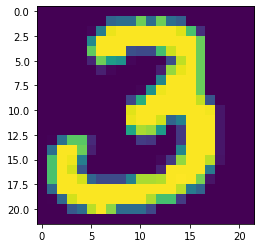

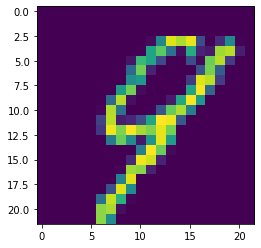

In [ ]:
import torch
from torchvision import datasets, transforms

crop_size = 22

traintransforms = []
traintransforms.append(transforms.CenterCrop(crop_size))
traintransforms.append(transforms.ToTensor())
traintransforms = transforms.Compose(traintransforms)

# GET THE TRAINING DATASET
train_data = datasets.MNIST(root='MNIST-data',                        # where is the data (going to be) stored
                            transform=traintransforms,          # transform the data from a PIL image to a tensor
                            train=True,                               # is this training data?
                            download=True                             # should i download it if it's not already here?
                           )

testtransforms = []
testtransforms.append(transforms.RandomCrop(crop_size))
testtransforms.append(transforms.ToTensor())
testtransforms = transforms.Compose(testtransforms)

# GET THE TEST DATASET
test_data = datasets.MNIST(root='MNIST-data',
                           transform=testtransforms,
                           train=False,
                          )

import matplotlib.pyplot as plt
import numpy as np
# PRINT THEIR LENGTHS AND VISUALISE AN EXAMPLE
x = train_data[np.random.randint(0, 300)][0]    # get the first example
plt.imshow(x[0].numpy())
plt.show()
x = test_data[np.random.randint(0, 300)][0]    # get the first example
plt.imshow(x[0].numpy())
plt.show()

# FURTHER SPLIT THE TRAINING INTO TRAINING AND VALIDATION
train_data, val_data = torch.utils.data.random_split(train_data, [50000, 10000])    # split into 50K training & 10K validation

In [ ]:
batch_size = 128

# MAKE TRAINING DATALOADER
train_loader = torch.utils.data.DataLoader(
    train_data,
    shuffle=True,
    batch_size=batch_size
)

# MAKE VALIDATION DATALOADER
val_loader = torch.utils.data.DataLoader(
    val_data,
    shuffle=True,
    batch_size=batch_size
)

# MAKE TEST DATALOADER
test_loader = torch.utils.data.DataLoader(
    test_data,
    shuffle=True,
    batch_size=batch_size
)

In [ ]:
import torch.nn.functional as F 
import torch.nn as nn

class NeuralNetworkClassDropout(torch.nn.Module):
    def __init__(self):
        super().__init__()    # initialise parent module
        self.layer1 = torch.nn.Linear(crop_size*crop_size, 225)
        self.layer2 = torch.nn.Linear(225, 100)
        self.layer3 = torch.nn.Linear(100, 10)
        self.dropout1 = nn.Dropout(p=0.5)
        self.dropout2 = nn.Dropout(p=0.2)

        
    def forward(self, x):
        x = x.view(-1, crop_size*crop_size)
        x = self.layer1(x)
        x = self.dropout1(x)
        x = F.relu(x)
        x = self.layer2(x)
        x = self.dropout2(x)       
        x = F.relu(x)
        x = self.layer3(x)
        x = F.softmax(x, dim=1)
        return x

def get_n_params(model):
    model_parameters = filter(lambda p: p.requires_grad, model.parameters())
    n_params = sum([np.prod(p.size()) for p in model_parameters])
    return n_params

In [ ]:
learning_rate = 0.0005
myNeuralNetworkDropout = NeuralNetworkClassDropout()
print('Number of parameters in model:', get_n_params(myNeuralNetworkDropout))

# CREATE OUR OPTIMISER
optimiser = torch.optim.Adam(              # what optimiser should we use?
    myNeuralNetworkDropout.parameters(),          # what should it optimise?
    lr=learning_rate                       # using what learning rate?
)

# CREATE OUR CRITERION
criterion = torch.nn.CrossEntropyLoss()             # callable class that compares our predictions to our labels and returns our loss

# SET UP TRAINING VISUALISATION
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()                            # we will use this to show our models performance on a graph

Number of parameters in model: 132735


In [ ]:
# TRAINING LOOP
def train(model, epochs):
    model.train()                                  # put the model into training mode (more on this later)
    for epoch in range(epochs):
        for idx, minibatch in enumerate(train_loader):
            inputs, labels = minibatch
            prediction = model(inputs)             # pass the data forward through the model
            loss = criterion(prediction, labels)   # compute the loss
            print('Epoch:', epoch, '\tBatch:', idx, '\tLoss:', loss)
            optimiser.zero_grad()                  # reset the gradients attribute of each of the model's params to zero
            loss.backward()                        # backward pass to compute and set all of the model param's gradients
            optimiser.step()                       # update the model's parameters
            writer.add_scalar('Loss/Train', loss, epoch*len(train_loader) + idx)    # write loss to a graph
            
            
train(myNeuralNetworkDropout, 2)

Epoch: 0 	Batch: 0 	Loss: tensor(2.3021, grad_fn=<NllLossBackward>)
Epoch: 0 	Batch: 1 	Loss: tensor(2.3022, grad_fn=<NllLossBackward>)
Epoch: 0 	Batch: 2 	Loss: tensor(2.3005, grad_fn=<NllLossBackward>)
Epoch: 0 	Batch: 3 	Loss: tensor(2.3003, grad_fn=<NllLossBackward>)
Epoch: 0 	Batch: 4 	Loss: tensor(2.2991, grad_fn=<NllLossBackward>)
Epoch: 0 	Batch: 5 	Loss: tensor(2.2981, grad_fn=<NllLossBackward>)
Epoch: 0 	Batch: 6 	Loss: tensor(2.2965, grad_fn=<NllLossBackward>)
Epoch: 0 	Batch: 7 	Loss: tensor(2.2943, grad_fn=<NllLossBackward>)
Epoch: 0 	Batch: 8 	Loss: tensor(2.2953, grad_fn=<NllLossBackward>)
Epoch: 0 	Batch: 9 	Loss: tensor(2.2917, grad_fn=<NllLossBackward>)
Epoch: 0 	Batch: 10 	Loss: tensor(2.2902, grad_fn=<NllLossBackward>)
Epoch: 0 	Batch: 11 	Loss: tensor(2.2924, grad_fn=<NllLossBackward>)
Epoch: 0 	Batch: 12 	Loss: tensor(2.2852, grad_fn=<NllLossBackward>)
Epoch: 0 	Batch: 13 	Loss: tensor(2.2855, grad_fn=<NllLossBackward>)
Epoch: 0 	Batch: 14 	Loss: tensor(2.2808, gr

In [ ]:
def calc_accuracy(model, dataloader):
    num_correct = 0
    num_examples = len(dataloader.dataset)                       # test DATA not test LOADER
    for inputs, labels in dataloader:                  # for all exampls, over all mini-batches in the test dataset
        predictions = model(inputs)
        predictions = torch.max(predictions, axis=1)    # reduce to find max indices along direction which column varies
        predictions = predictions[1]                    # torch.max returns (values, indices)
        num_correct += int(sum(predictions == labels))
    percent_correct = num_correct / num_examples * 100
    return percent_correct


print('Train Accuracy:', calc_accuracy(myNeuralNetworkDropout, train_loader))
print('Validation Accuracy:', calc_accuracy(myNeuralNetworkDropout, val_loader))
print('Test Accuracy:', calc_accuracy(myNeuralNetworkDropout, test_loader))

Train Accuracy: 90.75800000000001
Validation Accuracy: 90.86999999999999
Test Accuracy: 43.580000000000005


### 5. Summary
***List the key points like:***

* dropout definition in a sentence
* ensemble method
* how to overcome overfitting after applying dropout, show model performance metrics

### 6. What to do next?
* Challenge about dropout, search on net, 3 example

In [ ]:
# test